## imports

In [1]:
from a_star_search import load_model

In [2]:
model = load_model('../DeepCubeA/benchmark/models/DAVI_step_10_7x7.pth', input_size=7*7*4)

In [3]:
import gzip
import pickle

In [4]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
def create_model():
    class ResidualBlock(nn.Module):

        def __init__(self, num_features):
            super(ResidualBlock, self).__init__()

            self.fc1 = nn.Linear(num_features, num_features)
            self.relu = nn.PReLU()
            self.fc2 = nn.Linear(num_features, num_features)

        def forward(self, x):
            identity = x

            out = self.fc1(x)
            out = self.relu(out)

            out = self.fc2(out)

            out += identity

            return self.relu(out)

    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()

            self.model = nn.Sequential(
                nn.Linear(5*5+1, 5000),
                nn.PReLU(),

                nn.Linear(5000, 1000),
                nn.PReLU(),

                ResidualBlock(1000),
                
                nn.Linear(1000, 5*5)
            )

        def forward(self, x):
            return self.model(x)

    return Net()


env_model = create_model().to(device)
env_model.load_state_dict(torch.load("environment_model_mse/v2/environment_model_1330_0.06797801703214645.pth"))

<All keys matched successfully>

In [6]:
#import pyximport; pyximport.install()
#pyximport.install(pyimport=True)

In [7]:
import gc
gc.collect()

47

## solve games

In [8]:
from a_star_search import search_way
from tqdm import tqdm_notebook
import time
import numpy as np
from scipy.special._ufuncs import binom

actions_len_list = []
explored_len_list = []
possible_states_list = []
solve_time = []
results = []


with gzip.open('../DeepCubeA/benchmark/data/sokoban-small-v1.pkl.gz', 'rb') as f:
    envs = pickle.load(f)

for env in tqdm_notebook(envs):
    start_time = time.time()
    result, explored_len = search_way(env, model, env_model, hybrid=False)
    if type(result) is list and len(result) > 0:
        solve_time.append(time.time() - start_time)
        actions_len_list.append(len(result))
        explored_len_list.append(len(result) / float(explored_len))
        x = sum((env.room_state > 0).flatten())
        possible_states_list.append(len(result) / x * binom(x-1, env.num_boxes))
        results.append(result)
    else:
        print('ERROR, could not find a path 😢')
        solve_time.append(0)
        actions_len_list.append(0)
        explored_len_list.append(0)
        possible_states_list.append(0)
        results.append([])

 41%|████      | 3915/9520 [00:24<00:34, 160.74it/s]
7170it [00:40, 151.44it/s]                          
  0%|          | 20/7280 [00:00<00:36, 197.80it/s]

ERROR, could not find a path 😢


37392it [05:11, 119.91it/s]                         
  0%|          | 20/23940 [00:00<02:33, 155.92it/s]

ERROR, could not find a path 😢


  0%|          | 30/12240 [00:00<01:02, 196.23it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 20/7280 [00:00<00:37, 193.38it/s]

ERROR, could not find a path 😢


  0%|          | 20/4004 [00:00<00:27, 146.35it/s]

ERROR, could not find a path 😢


4598it [00:24, 188.81it/s]                          
  0%|          | 0/7280 [00:00<?, ?it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 20/7280 [00:00<00:38, 188.49it/s]

ERROR, could not find a path 😢


15525it [01:31, 170.21it/s]                         
  0%|          | 30/7280 [00:00<00:34, 210.04it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 20/12240 [00:00<01:22, 148.05it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 20/4004 [00:00<00:24, 160.90it/s]

ERROR, could not find a path 😢


  0%|          | 0/9520 [00:00<?, ?it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 0/4004 [00:00<?, ?it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢


6208it [00:32, 188.35it/s]                          
 72%|███████▏  | 6844/9520 [00:36<00:14, 188.27it/s]
12077it [01:17, 166.13it/s]                         
33900it [03:06, 164.15it/s]                           
  0%|          | 20/23940 [00:00<02:24, 165.59it/s]

ERROR, could not find a path 😢


 10%|▉         | 720/7280 [00:04<00:37, 175.66it/s]
5958it [00:31, 192.00it/s]                          
  0%|          | 20/4004 [00:00<00:24, 163.05it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢
ERROR, could not find a path 😢


7689it [00:39, 192.68it/s]                          
  0%|          | 20/12240 [00:00<01:16, 159.95it/s]

ERROR, could not find a path 😢


  0%|          | 20/9520 [00:00<00:56, 167.38it/s]

ERROR, could not find a path 😢


 47%|████▋     | 4455/9520 [00:24<00:28, 179.73it/s]
59950it [10:57, 104.43it/s]                           
  1%|          | 30/4004 [00:00<00:16, 235.36it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢


  9%|▉         | 358/4004 [00:01<00:18, 199.53it/s]
20588it [01:50, 186.92it/s]                         
26863it [03:13, 138.78it/s]                         
  0%|          | 20/15504 [00:00<01:35, 161.35it/s]

ERROR, could not find a path 😢


  0%|          | 20/29260 [00:00<02:39, 183.72it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢


  0%|          | 20/9520 [00:00<01:01, 154.23it/s]

ERROR, could not find a path 😢


  0%|          | 20/9520 [00:00<00:57, 165.87it/s]

ERROR, could not find a path 😢


  0%|          | 20/12240 [00:00<01:11, 170.55it/s]

ERROR, could not find a path 😢


  0%|          | 0/19380 [00:00<?, ?it/s]

ERROR, could not find a path 😢
ERROR, could not find a path 😢



## statistics

In [9]:
print('actions_len_list', np.mean(actions_len_list))
print('explored_len_list', np.mean(explored_len_list) * 100)
print('possible_states_list', np.mean(possible_states_list))
print('solve_time', np.mean(solve_time))

actions_len_list 8.02
explored_len_list 1.2643141651839656
possible_states_list 247.7440044055102
solve_time 25.951396136283876


In [10]:
temp = []
explored_len_list_ = []
possible_states_list = []
for env, result, explored_len in zip(envs, results, explored_len_list):
    x = sum((env.room_state > 0).flatten())
    explored_states = 1 / explored_len * len(result)
    explored_len_list_.append(explored_states)
    possible_states = x * binom(x-1, env.num_boxes)
    possible_states_list.append(possible_states)
    temp.append(explored_states / possible_states * 100)


ZeroDivisionError: division by zero

In [ ]:
stats = {
    'actions_len_list': actions_len_list,
    'explored_len_list': explored_len_list_,
    'possible_states_list': possible_states_list,
    'solve_time': solve_time,
    'results': results
}

#with gzip.open(f'stats/sokoban-small-v1.pkl.gz', 'wb') as f:
#    pickle.dump(stats, f, pickle.HIGHEST_PROTOCOL)

## plots

In [11]:
import matplotlib.pyplot as plt

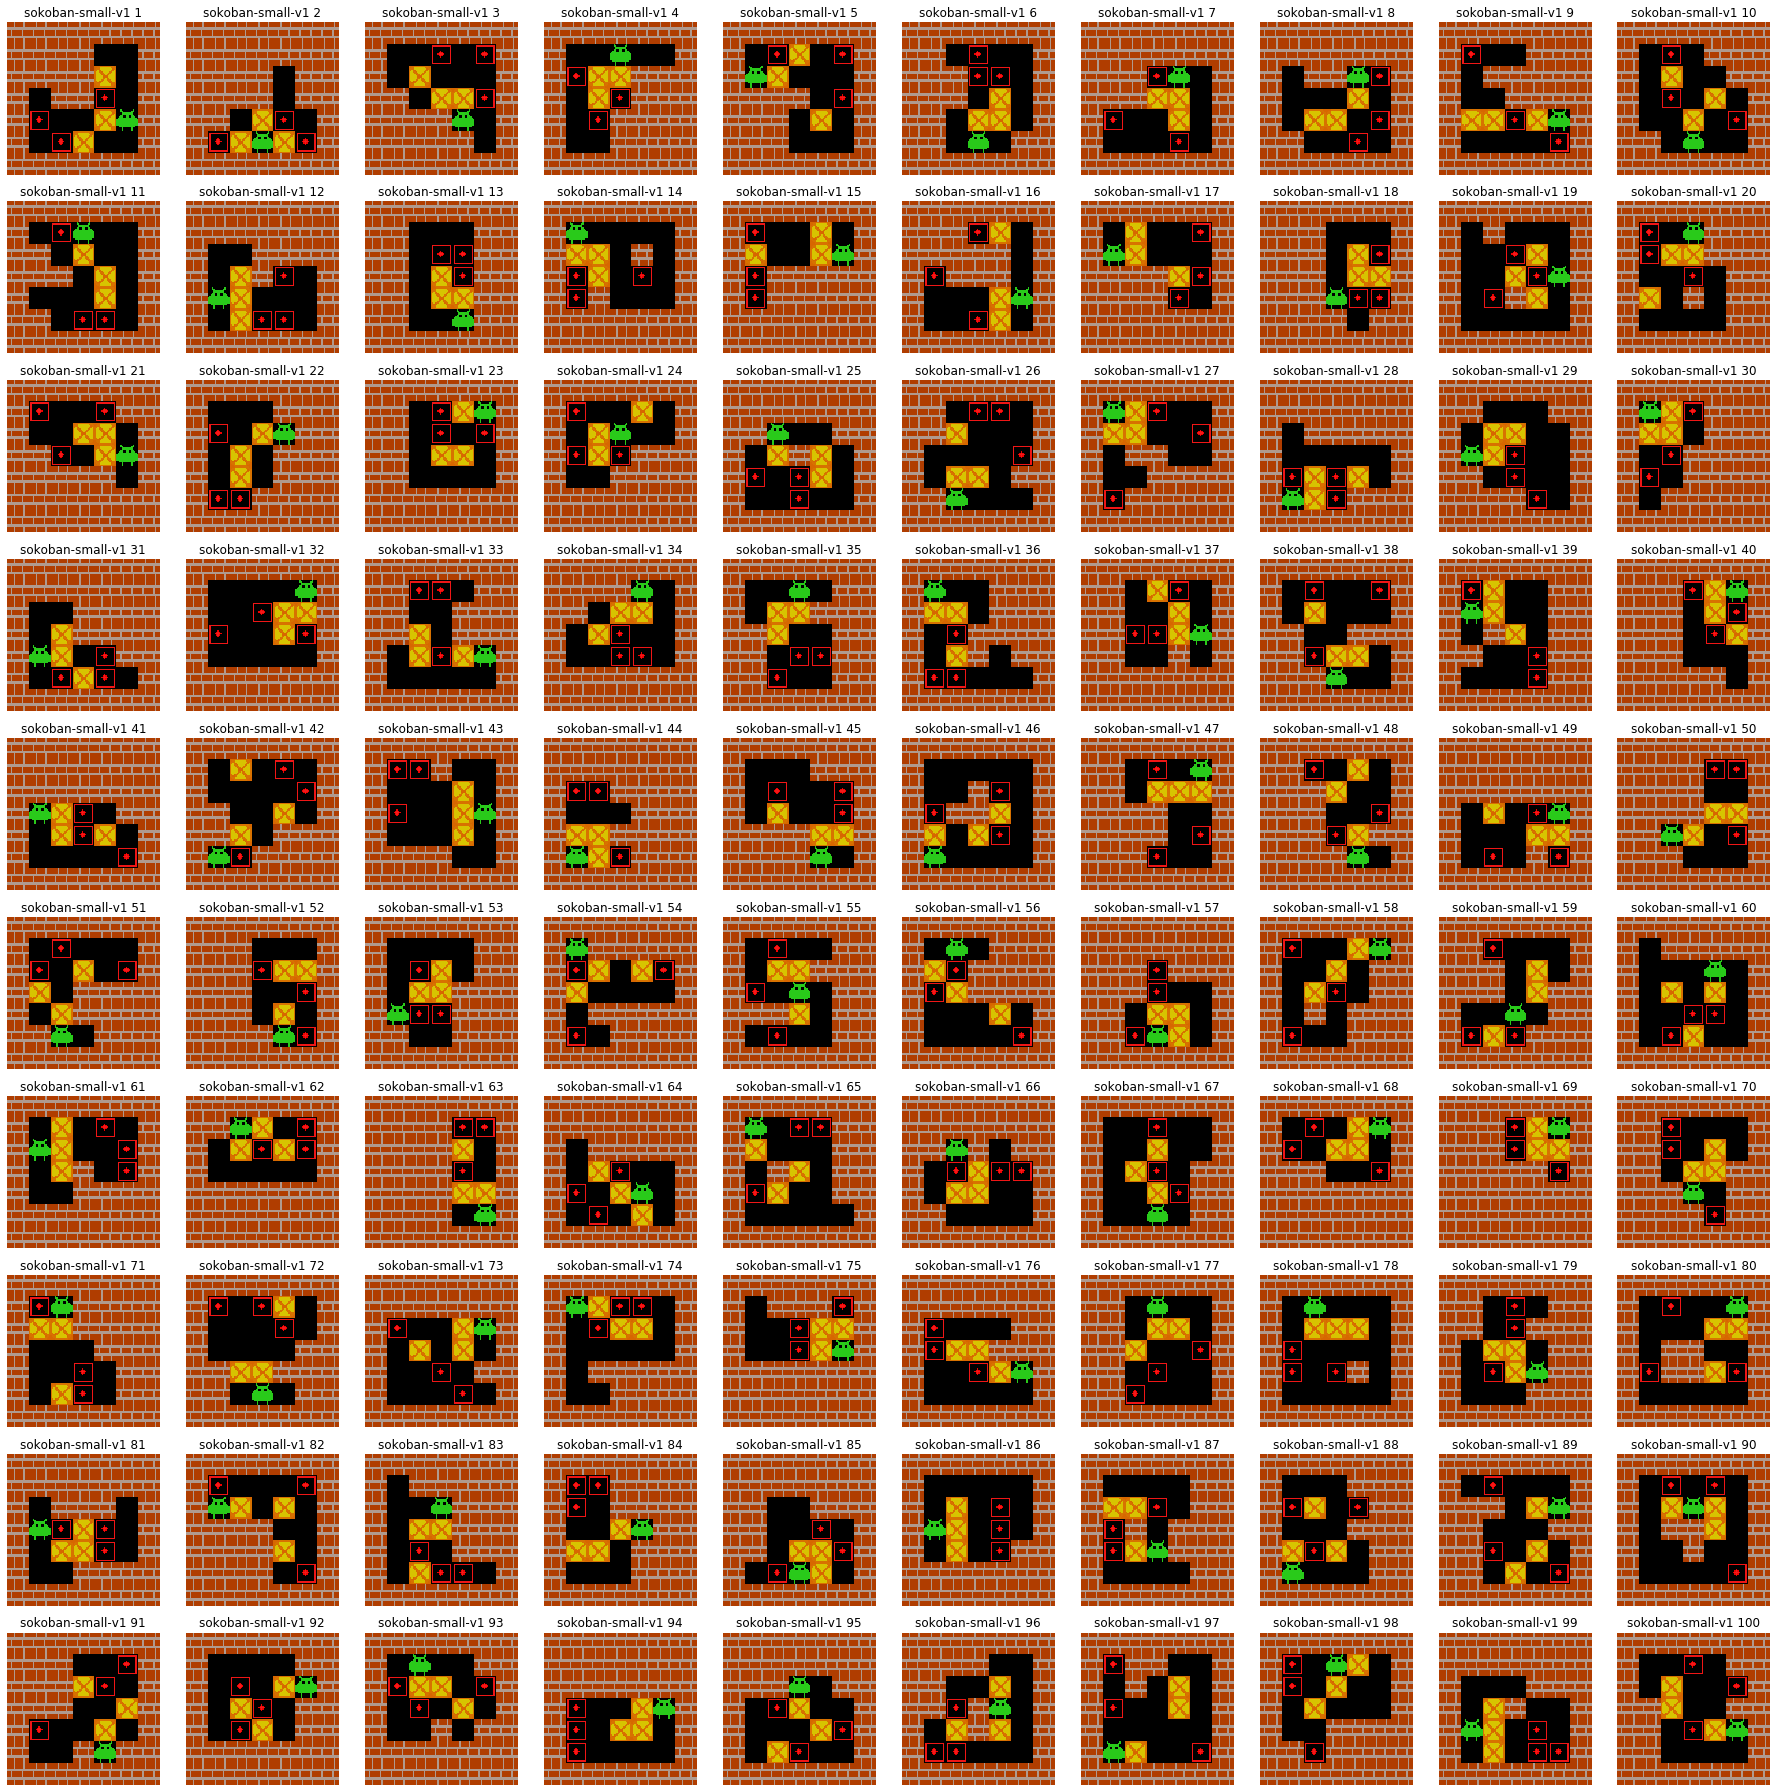

In [12]:
fig = plt.figure(figsize=(25, 25))
for idx, env in enumerate(envs):
    img = env.render(mode='rgb_array')
    fig.add_subplot(10, 10, idx + 1)
    plt.axis('off')
    plt.title(f'sokoban-small-v1 {idx + 1}')
    plt.imshow(img)
plt.axis('off')
fig.tight_layout()
# plt.savefig("plots/sokoban-small-v1_unsolved.pdf")
plt.show()

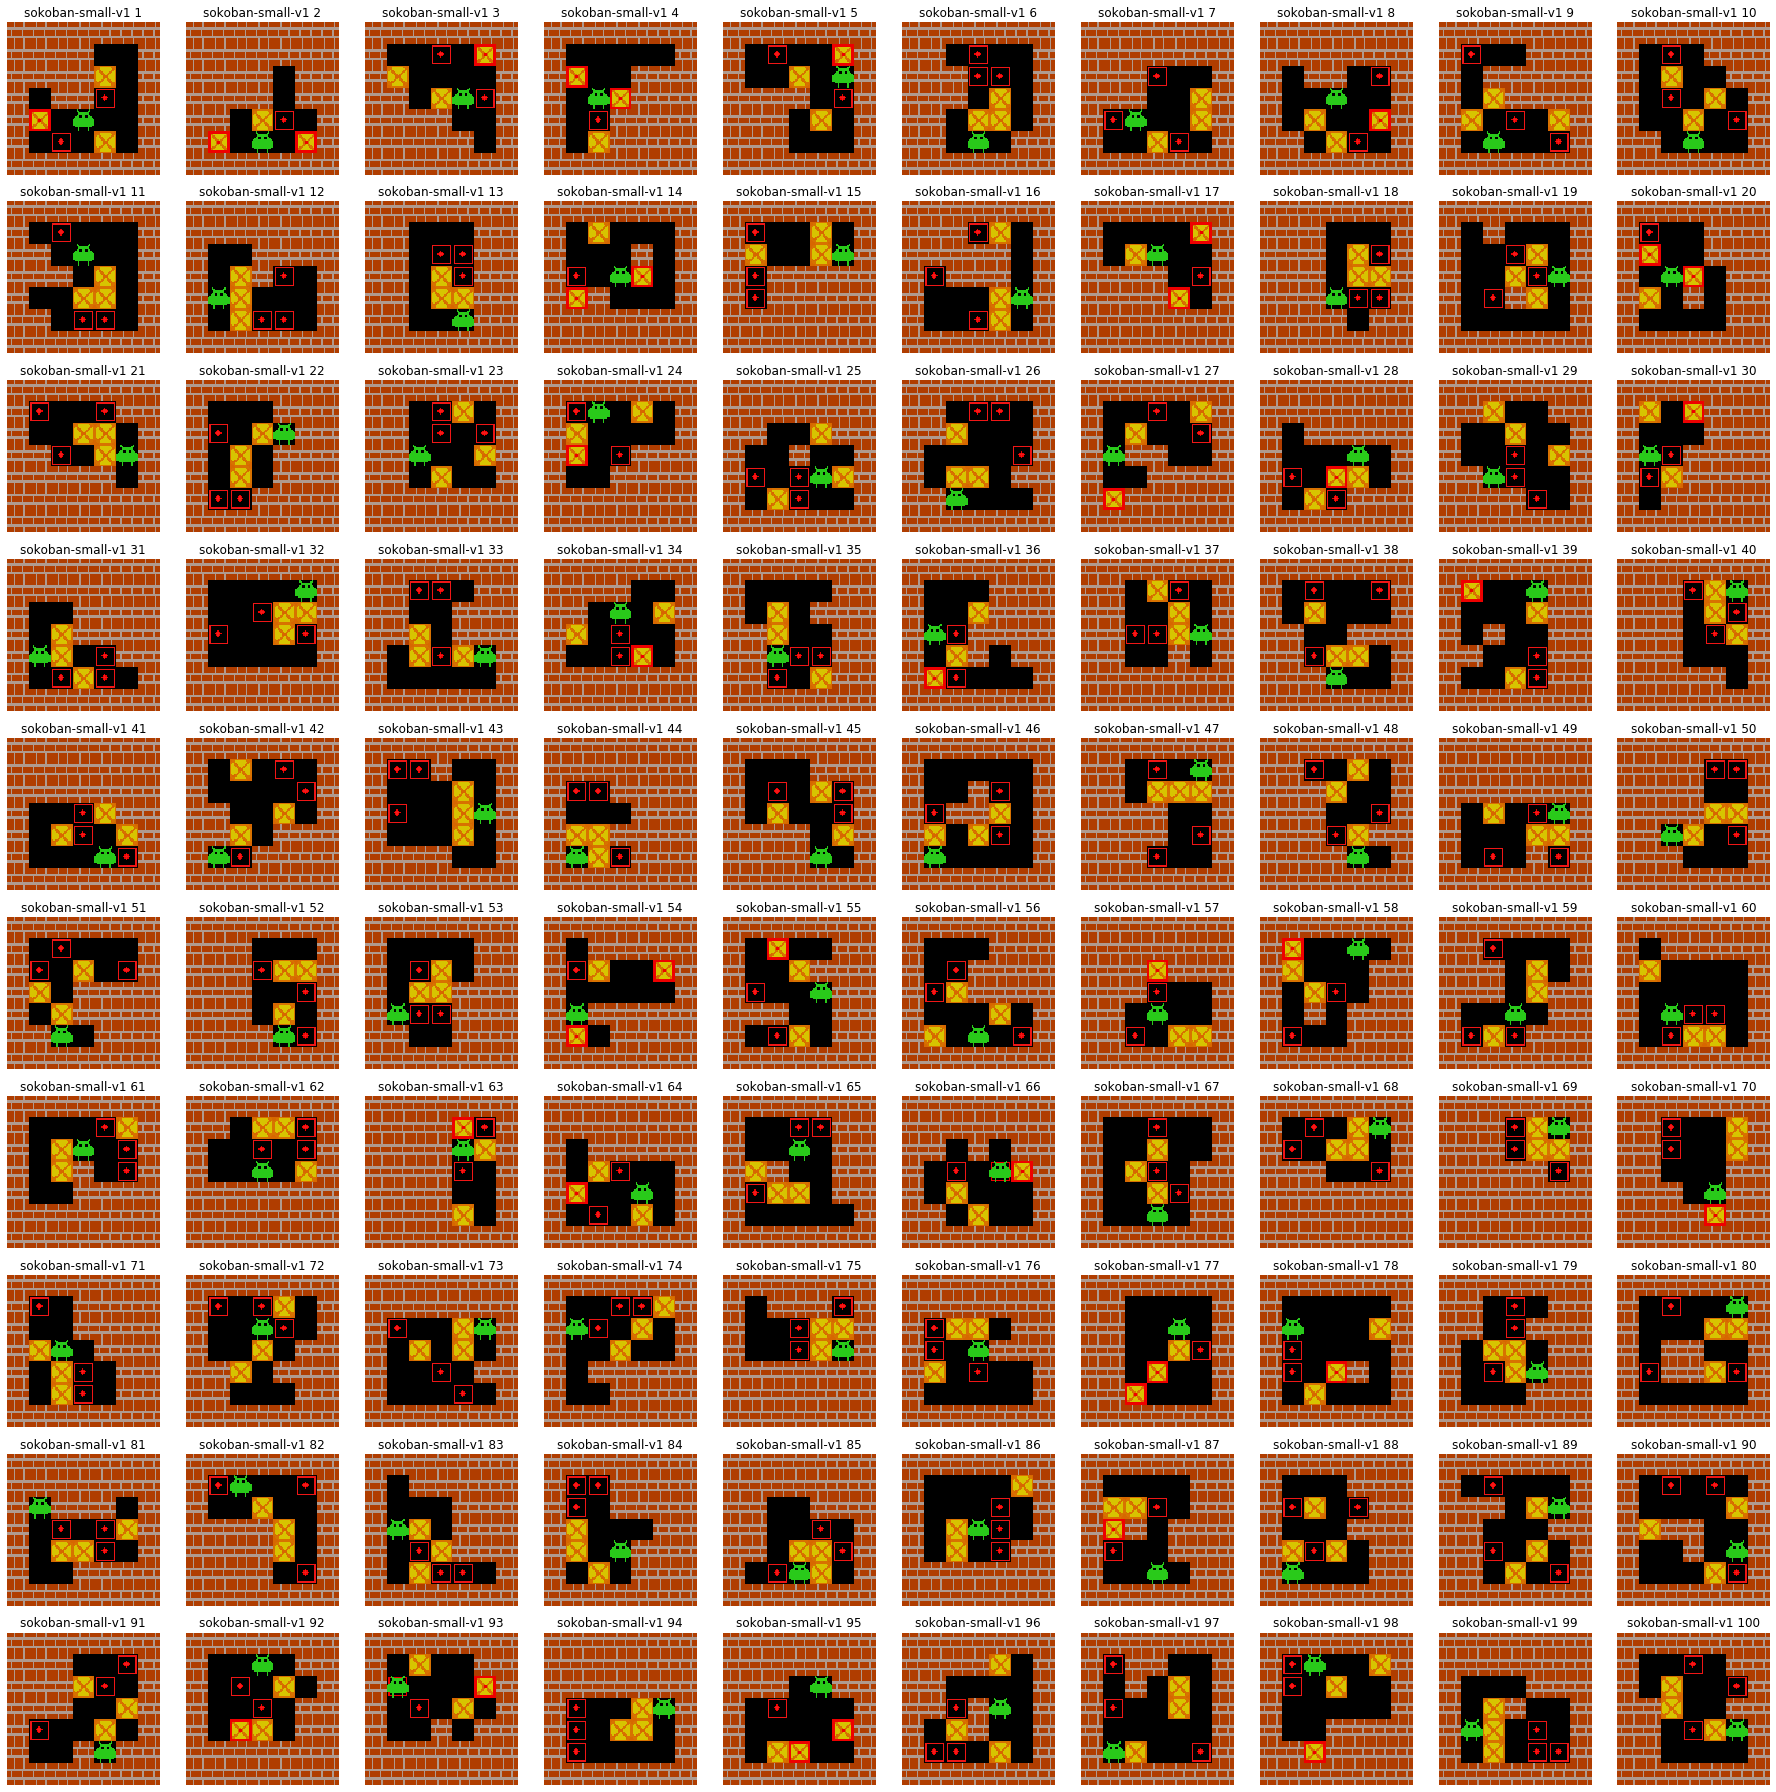

In [13]:
from copy import deepcopy

fig = plt.figure(figsize=(25, 25))
for idx, (env, actions) in enumerate(zip(envs, results)):
    env = deepcopy(env)
    
    step = 0
    for action in actions:
        next_state, reward, done, _ = env.step(action)
        step += 1
    
    img = env.render(mode='rgb_array')
    fig.add_subplot(10, 10, idx + 1)
    plt.axis('off')
    plt.title(f'sokoban-small-v1 {idx + 1}')
    plt.imshow(img)
plt.axis('off')
fig.tight_layout()
# plt.savefig("plots/sokoban-small-v1_solved.pdf")
plt.show()